# "Human or Robot" 
## Predicting Auction Fraud

On an auction website, human bidders are becoming increasingly frustrated with their inability to win auctions vs. their software-controlled counterparts. As a result, usage from the site's core customer base is plummeting. In order to rebuild customer happiness, the site owners need to eliminate computer generated bidding from their auctions.

The goal is to identify online auction bids that are placed by "robots", helping the site owners easily flag these users for removal from their site to prevent unfair auction activity.


<img src="../images/robots-greeting.png" width="500">

## EXPLORATORY DATA ANALYSIS 

## Initial hypothesis:
1. Total number of bids: Robots might have significantly higher number of bids than humans.
2. Number of bids per auction: Robots might have higher number of bids each auction.
3. Response time: Robots might bid more often, so time between each bid will be shorter than for humans' bid.
4. Distinct IPs: Robots might bid from more diverse IP addresses.
5. Merchandise: Robots might bid more often on certain merchandises. 

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# load dfs
train = pd.read_csv('../data/train.csv')
auction_df = pd.read_csv('../large_data/auction_df')
auction_df

,bid_id,auction,merchandise,device,time,country,ip,url,bidder_id,payment_account,address,outcome
0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
2,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
3,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
4,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3071219,609792.0,jefix,mobile,phone316,9.762802e+15,id,28.18.7.49,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
3071220,2297899.0,jefix,mobile,phone33,9.772601e+15,id,161.237.171.157,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
3071221,3400601.0,jqx39,office equipment,phone11,9.636754e+15,sa,54.212.21.87,cgb17jpn1ixq9hw,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0
3071222,2007255.0,ntjde,jewelry,phone59,9.770756e+15,ru,79.72.96.0,9ov8hm82p20sxlz,84a769adc98498f52debfe57b93a0789556f4,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,a3d2de7675556553a5f08e4c88d2c228fib6p,0.0


In [3]:
auction_df.columns

Index(['bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip',
       'url', 'bidder_id', 'payment_account', 'address', 'outcome'],
      dtype='object')

### Descriptive Statistics

In [4]:
# total
total_bidders = auction_df['bidder_id'].nunique()
total_bids = auction_df['bid_id'].nunique()
total_devices = auction_df['device'].nunique()
total_ips = auction_df['ip'].nunique()
total_urls = auction_df['url'].nunique()
total_merchandise = auction_df['merchandise'].nunique()
total_country = auction_df['country'].nunique()
total_auction = auction_df['auction'].nunique()

# print statements
print("Number of total bidders: {:,}".format(total_bidders))
print("Number of total bids: {:,}".format(total_bids))
print("Number of devices: {:,}".format(total_devices))
print("Number of IPs: {:,}".format(total_ips))
print("Number of URLs: {:,}".format(total_urls))
print("Number of merchandise categories: {:,}".format(total_merchandise))
print("Number of countries: {:,}".format(total_country))
print("Number of auctions: {:,}".format(total_auction))

Number of total bidders: 1,984
Number of total bids: 3,071,224
Number of devices: 5,729
Number of IPs: 1,030,950
Number of URLs: 663,873
Number of merchandise categories: 10
Number of countries: 199
Number of auctions: 12,740


**Proportion of Fraudulent vs. Legitimate Bids**

In [5]:
# proportions
legitimate_bids = len(auction_df[auction_df['outcome'] == 0.0])
fraudulent_bids = len(auction_df[auction_df['outcome'] == 1.0])

legitimate = legitimate_bids/total_bids
fraud = fraudulent_bids/total_bids

# print
print("Proportion of legitimate bids: {:.2%}".format(legitimate))
print("Proportion of fraudulent bids: {:.2%}".format(fraud))

Proportion of legitimate bids: 86.57%
Proportion of fraudulent bids: 13.43%


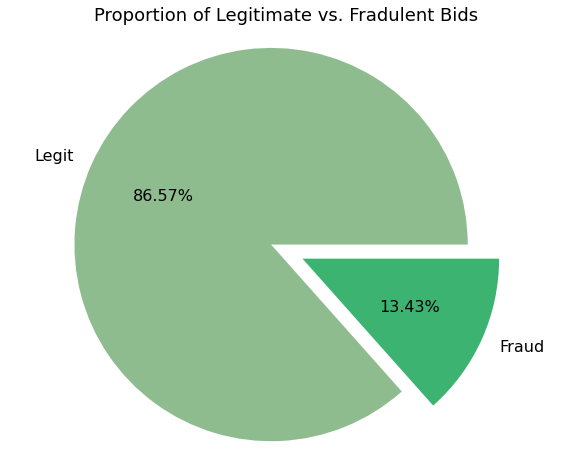

In [6]:
import matplotlib.pyplot as plt

#add colors
colors = ['darkseagreen', 'mediumseagreen']

# graph legit vs. fraud bids
_, ax = plt.subplots(figsize=(10, 8))

# pie chart parameters
pie_data = [legitimate, fraud]
pie_labels = ('Legit', 'Fraud')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', colors=colors,
       shadow=False, explode=pie_labels_explode_coefficients,  textprops={'fontsize': 16})
ax.set_title("Proportion of Legitimate vs. Fradulent Bids", fontsize=18)
plt.axis('equal')
plt.show()

**Proportion of Human vs. Robot Bidders**

In [7]:
# total
total_bidders = train['bidder_id'].nunique()

# proportions
human_bids = len(train[train['outcome'] == 0.0])
robot_bids = len(train[train['outcome'] == 1.0])

human = human_bids/total_bidders
robot = robot_bids/total_bidders

# print
print("Proportion of human bidders: {:.2%}".format(human))
print("Proportion of robot bidders: {:.2%}".format(robot))

Proportion of human bidders: 94.88%
Proportion of robot bidders: 5.12%


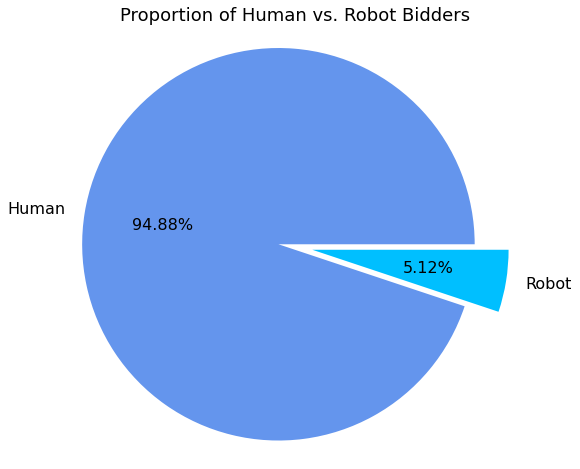

In [8]:
# graph human vs. bot
_, ax = plt.subplots(figsize=(10, 8))

#add colors
colors = ['cornflowerblue', 'deepskyblue']

# pie chart parameters
pie_data = [human, robot]
pie_labels = ('Human', 'Robot')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', colors=colors,
       shadow=False, explode=pie_labels_explode_coefficients,  textprops={'fontsize': 16})
ax.set_title("Proportion of Human vs. Robot Bidders", fontsize=18)
plt.axis('equal')
plt.show()

**First impressions:**
1. The data is highly unbalanced from both the bidders and bid perspective.
2. Humans represent 94.88% of the data, while only 5.12% are robots.
3. Legitimate bids represent 86.52% of the data, while 13.43% are fraudulent bids.
4. Proportionally robots are putting more bids than humans.
5. There are 12,740 auctions represented in this dataset, and over 3 million bids.
6. Bids come from 5,729 device models in 199 countries, 663,873 URLs and 1,030,950 IP addresses.
7. There are 10 distinct merchandise categories.

In [9]:
# distinct merchandise
auction_df['merchandise'].unique()

array(['home goods', 'office equipment', 'sporting goods',
       'books and music', 'mobile', 'jewelry', 'computers', 'clothing',
       'furniture', 'auto parts'], dtype=object)

## Bids per Merchandise:
- graph distribution of bids from human and bot per merchandise.
- graph top 5 merchandise receiving bids from robots.
- graph countries where most robots bid from.

### Merchandise Heatmap
- Number of Human and Robot bids per Merchandise

In [10]:
merch_df = auction_df[['merchandise', 'outcome']]

# Creating a pivot table with merchandise as index, outcome as columns and count of outcome as values 
merch_human_bot = merch_df.pivot_table(values='outcome', index='merchandise', columns='outcome', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
merch_human_bot.style.background_gradient(cmap ='Blues', axis=0)

outcome,0.0,1.0
merchandise,,
auto parts,9757,0
books and music,13733,1509
clothing,476,0
computers,9733,11667
furniture,87807,0
home goods,389249,18708
jewelry,555634,37101
mobile,492350,105138
office equipment,160671,7967


**Take away:**
1. Robots bid heavily on sporting goods and mobile, followed by jewelry, and home goods.
2. Robots did NOT bid on auto parts, clothing, and furniture.
3. Humans have bid on all available categories. They bid heavily on sporting goods (like the robots), jewelry, mobile (like the robots), and home goods.

Text(0, 0.5, 'Frequency')

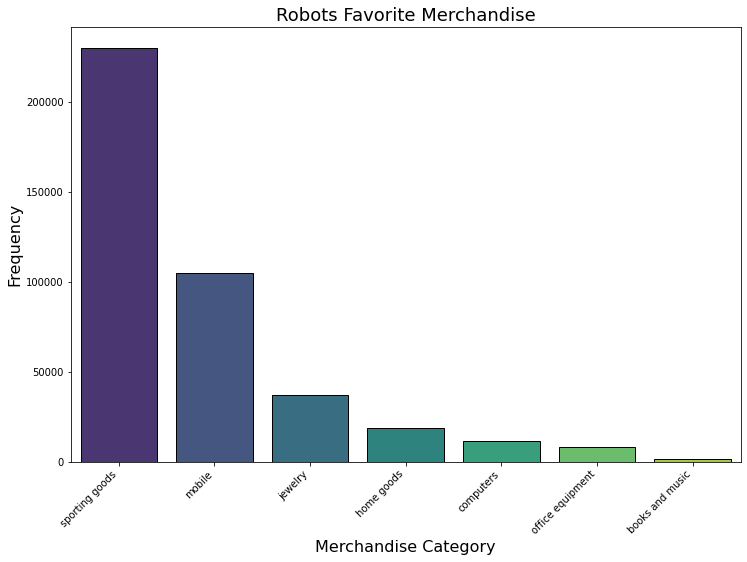

In [11]:
# merchandise robot bids
merch_robots = merch_df[merch_df['outcome'] == 1.0]

order = ['sporting goods', 'mobile', 'jewelry', 'home goods', 'computers', 'office equipment', 'books and music']

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="merchandise",
                   data=merch_robots, order=order, palette="viridis", edgecolor="k")
ax.set_title("Robots Favorite Merchandise", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel("Merchandise Category", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

Text(0.5, 0, 'Frequency')

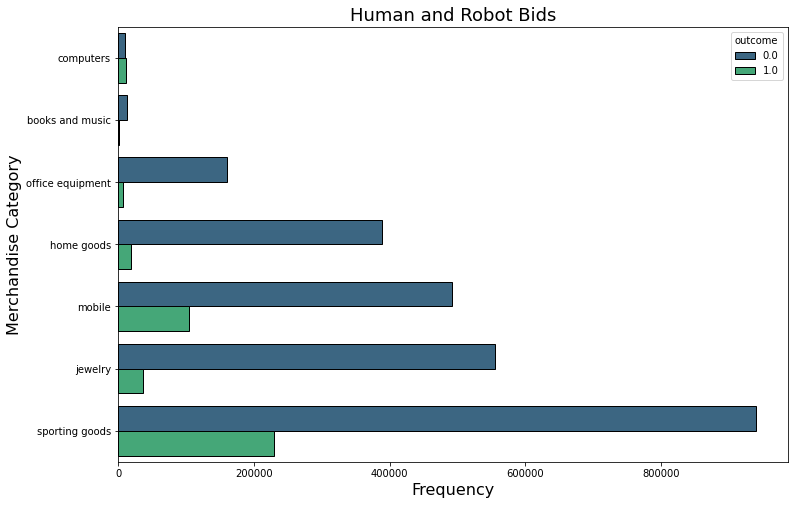

In [12]:
order = [ 'computers', 'books and music', 'office equipment', 'home goods', 'mobile', 'jewelry', 'sporting goods']


f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(y="merchandise", hue="outcome", order=order,
                   data=auction_df, palette="viridis", edgecolor="k")
ax.set_title("Human and Robot Bids", fontsize=18)
ax.set_ylabel("Merchandise Category", fontsize=16)
ax.set_xlabel("Frequency", fontsize=16)

## FEATURE ENGINEERING

In [13]:
# coming next

------